In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [4]:
#import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [5]:
import matplotlib

# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.   

original link no longer exists   
new: https://www.kdnuggets.com/2017/03/yhat-beginner-guide-customer-segmentation.html

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [6]:
#df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [7]:
df_offers.shape
df_offers.info()
df_offers.head(10)

(32, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   offer_id   32 non-null     int64 
 1   campaign   32 non-null     object
 2   varietal   32 non-null     object
 3   min_qty    32 non-null     int64 
 4   discount   32 non-null     int64 
 5   origin     32 non-null     object
 6   past_peak  32 non-null     bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 1.7+ KB


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
8,9,April,Chardonnay,144,57,Chile,False
9,10,April,Prosecco,72,52,California,False


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [8]:
#df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [9]:
df_transactions.shape
df_transactions.info()

(324, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_name  324 non-null    object
 1   offer_id       324 non-null    int64 
 2   n              324 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.7+ KB


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [10]:
#your turn


### merge dataframes

In [11]:
df_merge = pd.merge(df_offers, df_transactions, on='offer_id')

In [12]:
df_merge.head()
df_merge.tail()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
319,31,December,Champagne,72,89,France,False,Fisher,1
320,32,December,Cabernet Sauvignon,72,45,Germany,True,Young,1
321,32,December,Cabernet Sauvignon,72,45,Germany,True,Cooper,1
322,32,December,Cabernet Sauvignon,72,45,Germany,True,Gomez,1
323,32,December,Cabernet Sauvignon,72,45,Germany,True,Kelly,1


### create pivot table

In [13]:
pivot = df_merge.pivot_table(index=['customer_name'], columns=['offer_id'], values=['n'])

In [14]:
pivot.head()
pivot.tail()

n                                         ...               \
offer_id       1   2   3   4   5   6    7   8    9    10  ...  23   24  25   
customer_name                                             ...                
Adams         NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN  ... NaN  NaN NaN   
Allen         NaN NaN NaN NaN NaN NaN  NaN NaN  1.0  NaN  ... NaN  NaN NaN   
Anderson      NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN  ... NaN  1.0 NaN   
Bailey        NaN NaN NaN NaN NaN NaN  1.0 NaN  NaN  NaN  ... NaN  NaN NaN   
Baker         NaN NaN NaN NaN NaN NaN  1.0 NaN  NaN  1.0  ... NaN  NaN NaN   

                                                
offer_id        26   27  28   29   30   31  32  
customer_name                                   
Adams          NaN  NaN NaN  1.0  1.0  NaN NaN  
Allen          NaN  1.0 NaN  NaN  NaN  NaN NaN  
Anderson       1.0  NaN NaN  NaN  NaN  NaN NaN  
Bailey         NaN  NaN NaN  NaN  1.0  NaN NaN  
Baker          NaN  NaN NaN  NaN  NaN  1.0 NaN  

[5 rows x 32 columns]

n                                           ...              \
offer_id        1   2   3    4   5    6   7    8    9    10  ...  23  24  25   
customer_name                                                ...               
Williams       NaN NaN NaN  NaN NaN  NaN NaN  NaN  NaN  NaN  ... NaN NaN NaN   
Wilson         NaN NaN NaN  NaN NaN  NaN NaN  1.0  NaN  NaN  ... NaN NaN NaN   
Wood           1.0 NaN NaN  NaN NaN  NaN NaN  NaN  NaN  1.0  ... NaN NaN NaN   
Wright         NaN NaN NaN  1.0 NaN  1.0 NaN  NaN  NaN  NaN  ... NaN NaN NaN   
Young          NaN NaN NaN  NaN NaN  1.0 NaN  NaN  1.0  NaN  ... NaN NaN NaN   

                                               
offer_id       26   27  28  29   30   31   32  
customer_name                                  
Williams      NaN  NaN NaN NaN  NaN  1.0  NaN  
Wilson        NaN  NaN NaN NaN  1.0  NaN  NaN  
Wood          NaN  NaN NaN NaN  NaN  1.0  NaN  
Wright        NaN  1.0 NaN NaN  NaN  NaN  NaN  
Young         NaN  NaN NaN NaN  NaN  1.0  1.0  

[5 rows x 32 columns]

### look at 2 customers from original data frame to understand pivot table

In [15]:
df_merge[df_merge['customer_name']=='Adams']
df_merge[df_merge['customer_name']=='Wood']

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
166,18,July,Espumante,6,50,Oregon,False,Adams,1
270,29,November,Pinot Grigio,6,87,France,False,Adams,1
288,30,December,Malbec,6,54,France,False,Adams,1


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
4,1,January,Malbec,72,56,France,False,Wood,1
106,10,April,Prosecco,72,52,California,False,Wood,1
141,14,June,Merlot,72,64,Chile,False,Wood,1
315,31,December,Champagne,72,89,France,False,Wood,1


### replace `NaN` with `0` to indicate customer did not use that offer

In [16]:
pivot = pivot.fillna(0)

In [17]:
pivot.head()
pivot.tail()

n                                               ...       \
offer_id        1    2    3    4    5    6    7    8    9    10  ...   23   
customer_name                                                    ...        
Adams          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
Allen          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
Anderson       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
Bailey         0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
Baker          0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0   

                                                            
offer_id        24   25   26   27   28   29   30   31   32  
customer_name                                               
Adams          0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  
Allen          0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
Anderson       1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
Bailey         0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
Baker          0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 32 columns]

n                                               ...       \
offer_id        1    2    3    4    5    6    7    8    9    10  ...   23   
customer_name                                                    ...        
Williams       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
Wilson         0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   
Wood           1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0   
Wright         0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
Young          0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0   

                                                            
offer_id        24   25   26   27   28   29   30   31   32  
customer_name                                               
Williams       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
Wilson         0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
Wood           0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
Wright         0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
Young          0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  

[5 rows x 32 columns]

### make `customer_name` a column rather than the `index`

In [18]:
pivot = pivot.reset_index()

In [19]:
pivot.head()

customer_name    n                                          ...       \
offer_id                  1    2    3    4    5    6    7    8    9  ...   23   
0                Adams  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1                Allen  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0   
2             Anderson  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3               Bailey  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   
4                Baker  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   

                                                       
offer_id   24   25   26   27   28   29   30   31   32  
0         0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  
1         0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2         1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3         0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 33 columns]

## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

In [20]:
# your turn


http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### select features

In [21]:
x_cols = pivot.drop(columns=['customer_name']).values

C:\Users\LoriN\anaconda3\envs\python3_7\lib\site-packages\pandas\core\generic.py:3878: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [22]:
x_cols.shape

(100, 32)

### Kmeans with 3 clusters

In [23]:
km_result = KMeans(n_clusters=3, random_state=59).fit(x_cols)

In [24]:
km_result.inertia_
km_result.cluster_centers_
km_result.labels_

227.98503490702976

array([[-5.55111512e-17, -5.55111512e-17,  5.40540541e-02,
        -9.71445147e-17, -2.08166817e-17,  2.70270270e-02,
         4.32432432e-01,  4.59459459e-01,  2.70270270e-02,
         5.40540541e-02,  2.70270270e-02,  2.70270270e-02,
         1.62162162e-01,  2.77555756e-17, -4.85722573e-17,
         2.70270270e-02,  0.00000000e+00,  3.51351351e-01,
         2.70270270e-02, -4.85722573e-17,  5.40540541e-02,
         2.70270270e-02, -2.77555756e-17, -9.71445147e-17,
         2.70270270e-02, -8.32667268e-17,  2.70270270e-02,
         2.70270270e-02,  4.32432432e-01,  4.86486486e-01,
         5.55111512e-17, -2.08166817e-17],
       [ 1.17647059e-01,  4.11764706e-01, -2.77555756e-17,
        -5.55111512e-17,  0.00000000e+00, -5.55111512e-17,
         2.77555756e-17, -2.77555756e-17, -1.38777878e-17,
         5.88235294e-02,  5.55111512e-17,  5.88235294e-02,
        -2.77555756e-17, -1.38777878e-17, -2.77555756e-17,
         5.88235294e-02,  4.11764706e-01, -5.55111512e-17,
        -6.93

array([0, 2, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2])

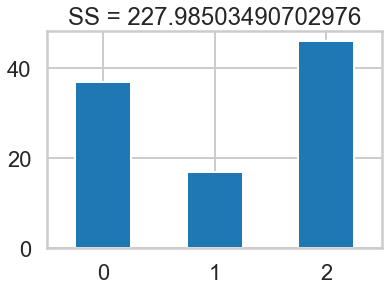

In [25]:
cluster_counts = pd.Series(km_result.labels_).value_counts().sort_index()
#cluster_counts

cluster_counts.plot.bar(rot=0);
plt.title('SS = ' + str(km_result.inertia_));

### Kmeans, vary number clusters

In [26]:
clusters = []
ss = []
fitted_model = []

for k in range(2,11):
    #print(k)
    km_result = KMeans(n_clusters=k, random_state=59).fit(x_cols)
    clusters.append(k)
    ss.append(km_result.inertia_)
    fitted_model.append(km_result)

In [27]:
df_all_models = pd.DataFrame(zip(clusters, ss, fitted_model), columns=['K', 'SS', 'fitted model'])
df_all_models

,K,SS,fitted model
0,2,251.922394,"KMeans(n_clusters=2, random_state=59)"
1,3,227.985035,"KMeans(n_clusters=3, random_state=59)"
2,4,214.214475,"KMeans(n_clusters=4, random_state=59)"
3,5,204.158487,"KMeans(n_clusters=5, random_state=59)"
4,6,196.052244,"KMeans(n_clusters=6, random_state=59)"
5,7,187.717201,"KMeans(n_clusters=7, random_state=59)"
6,8,177.507124,KMeans(random_state=59)
7,9,171.791438,"KMeans(n_clusters=9, random_state=59)"
8,10,164.849499,"KMeans(n_clusters=10, random_state=59)"


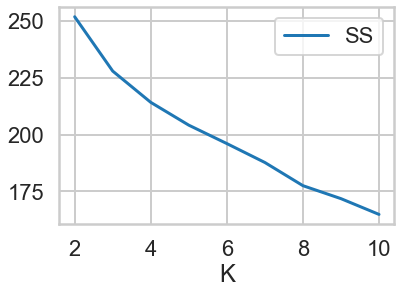

In [28]:
df_all_models.plot(x='K', y='SS');

### find elbow in plot via slope

In [29]:
dss = []
dss.append(0)

ss_values = df_all_models['SS'].values
for i in range(1, df_all_models.shape[0]):
    slope = ss_values[i]-ss_values[i-1]
    #print(df_all_models['K'][i], ss_values[i], slope)
    dss.append(slope)

#dss

In [30]:
df_all_models['dSS'] = dss
df_all_models

,K,SS,fitted model,dSS
0,2,251.922394,"KMeans(n_clusters=2, random_state=59)",0.000000
1,3,227.985035,"KMeans(n_clusters=3, random_state=59)",-23.937359
2,4,214.214475,"KMeans(n_clusters=4, random_state=59)",-13.770559
3,5,204.158487,"KMeans(n_clusters=5, random_state=59)",-10.055988
4,6,196.052244,"KMeans(n_clusters=6, random_state=59)",-8.106244
5,7,187.717201,"KMeans(n_clusters=7, random_state=59)",-8.335043
6,8,177.507124,KMeans(random_state=59),-10.210077
7,9,171.791438,"KMeans(n_clusters=9, random_state=59)",-5.715686
8,10,164.849499,"KMeans(n_clusters=10, random_state=59)",-6.941939


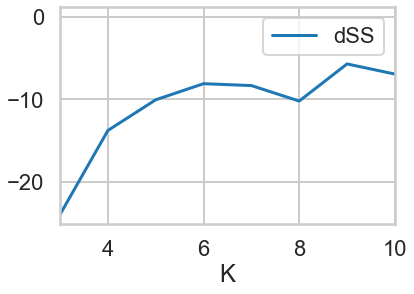

In [31]:
df_all_models.plot(x='K', y='dSS', xlim=(3,10));

### select elbow as `k=6`

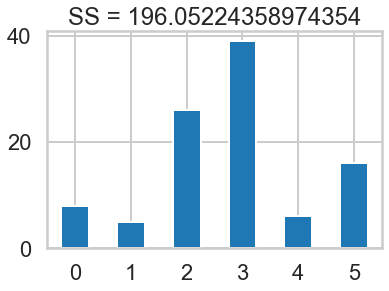

In [32]:
km_result = df_all_models[df_all_models['K']==6]['fitted model']
best_model = km_result.values[0]
#best_model.labels_

cluster_counts = pd.Series(best_model.labels_).value_counts().sort_index()
#cluster_counts

cluster_counts.plot.bar(rot=0);
plt.title('SS = ' + str(best_model.inertia_));

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

In [33]:
# Your turn.


### iterate thru all models and calculate silhouette quantities
just to be sure everything works properly before making plots   
get min and max silhouette values for plot

In [34]:
sil_min = []
sil_max = []

for i in range(df_all_models.shape[0]):
    #df_all_models.iloc[i]
    num_clusters = df_all_models.iloc[i]['K']
    fitted_model = df_all_models.iloc[i]['fitted model']
    cluster_labels = fitted_model.labels_
    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    silhouette_val = silhouette_samples(x_cols, cluster_labels)
    
    temp_min = np.min(silhouette_val)
    temp_max = np.max(silhouette_val)
    sil_min.append(temp_min)
    sil_max.append(temp_max)
    
    num_clusters, fitted_model.inertia_
    cluster_labels
    silhouette_avg, temp_min, temp_max
    silhouette_val

print('max and min silhouette values across all groups:', np.min(sil_min), np.max(sil_max))

(2, 251.92239364188885)

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

(0.08064976366048286, -0.1785084315379532, 0.37175054518757195)

array([ 0.32938848, -0.03262594,  0.0297114 ,  0.23641135, -0.04732219,
        0.03284556,  0.06283022,  0.30458834, -0.04973759,  0.3196764 ,
       -0.02665085,  0.04671963,  0.29915238,  0.03746652, -0.14117684,
        0.0297114 , -0.00309085,  0.06283022,  0.28883847,  0.01345068,
        0.36409663,  0.15421571, -0.00314953,  0.02871025,  0.00253731,
        0.05223124, -0.0362611 ,  0.00187602,  0.00404869, -0.00253085,
       -0.17850843,  0.15939201,  0.02275038,  0.00942102,  0.16277617,
        0.3056535 ,  0.03224952,  0.34133886,  0.0622081 ,  0.31840525,
        0.0297114 ,  0.04715423,  0.23313983,  0.01752146,  0.27900033,
        0.0518528 ,  0.30331379, -0.09616837,  0.0217582 , -0.00310754,
       -0.03321506,  0.06612908, -0.02018602,  0.00253731, -0.05362233,
        0.30458834,  0.04715423, -0.12617338,  0.26723676, -0.06153348,
       -0.01300412,  0.23313983, -0.04642762,  0.26723676,  0.37175055,
        0.03672472,  0.00253731, -0.0784027 , -0.02266582, -0.05

(3, 227.98503490702976)

array([0, 2, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2])

(0.11889942863638556, -0.1202847034264615, 0.45129435959557795)

array([ 0.25467959, -0.05914172,  0.41997092,  0.20921237, -0.07500641,
        0.03606376,  0.45129436,  0.21531786, -0.05246513,  0.27734254,
       -0.01042025,  0.41316185,  0.25685837,  0.05549514,  0.09717309,
        0.41997092, -0.02449395,  0.45129436,  0.21401696, -0.01155681,
        0.32107957,  0.08768326, -0.01531432,  0.0399689 ,  0.33525746,
        0.03957246, -0.05918949, -0.00930343, -0.00417708,  0.13620127,
        0.10840373,  0.12182206,  0.01721663,  0.01518328,  0.08708875,
        0.24356675,  0.01629601,  0.29878577, -0.01854004,  0.27948877,
        0.41997092,  0.44544276,  0.13922372,  0.02969429,  0.2243915 ,
        0.06669681,  0.27257494,  0.0727021 ,  0.00687136, -0.10758133,
       -0.06622058,  0.08812839,  0.10456179,  0.33525746, -0.04214253,
        0.21531786,  0.44544276,  0.07295132,  0.1953437 , -0.05307681,
       -0.02880476,  0.13922372, -0.03486861,  0.1953437 ,  0.30158653,
        0.15215372,  0.33525746, -0.1202847 , -0.00312482, -0.09

(4, 214.2144754676064)

array([1, 3, 0, 1, 2, 2, 0, 1, 3, 1, 3, 0, 1, 2, 1, 0, 3, 0, 1, 3, 1, 1,
       3, 2, 0, 3, 3, 3, 2, 0, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 0, 0, 1, 2,
       1, 3, 1, 1, 3, 3, 3, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0,
       0, 3, 2, 3, 3, 3, 3, 1, 2, 1, 0, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1, 3,
       3, 1, 2, 1, 3, 1, 3, 2, 1, 2, 3, 2])

(0.13374855843393788, -0.10831840720718391, 0.4463314285763968)

array([ 0.27593965, -0.03281347,  0.4126    ,  0.22380855,  0.02818959,
        0.11857832,  0.44633143,  0.23644687, -0.03386314,  0.29553117,
       -0.01081602,  0.40696378,  0.27355487,  0.06832641,  0.11038337,
        0.4126    , -0.01759659,  0.44633143,  0.23410042,  0.01990321,
        0.3372165 ,  0.10201212,  0.00596386,  0.055405  ,  0.32681001,
        0.05833678, -0.04937979,  0.0017733 ,  0.06034522,  0.13081059,
        0.12557174,  0.1354112 ,  0.02964498,  0.01647953,  0.10587952,
        0.25948139,  0.03675946,  0.3139606 , -0.01031265,  0.29352849,
        0.4126    ,  0.43958563,  0.15820468,  0.09505818,  0.24351549,
        0.05915845,  0.28538935,  0.07939251,  0.03329177, -0.10170979,
       -0.04741185,  0.08574843,  0.0931827 ,  0.32681001,  0.03972715,
        0.23644687,  0.43958563,  0.0866505 ,  0.21432873, -0.00950458,
        0.07748034,  0.15820468, -0.0038589 ,  0.21432873,  0.3209141 ,
        0.14706864,  0.32681001, -0.10831841,  0.05938395, -0.07

(5, 204.15848734598737)

array([2, 1, 3, 2, 1, 1, 3, 2, 0, 2, 4, 3, 2, 4, 4, 3, 1, 3, 2, 1, 2, 1,
       0, 4, 3, 1, 1, 4, 1, 3, 1, 2, 4, 0, 2, 2, 4, 2, 4, 2, 3, 3, 1, 1,
       2, 0, 2, 1, 4, 4, 1, 1, 4, 3, 0, 2, 3, 1, 2, 0, 1, 1, 4, 2, 2, 3,
       3, 1, 1, 1, 1, 1, 0, 2, 1, 2, 3, 0, 1, 3, 1, 4, 1, 3, 2, 2, 2, 4,
       1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0])

(0.1300980113710439, -0.1551099917679101, 0.46827841519357266)

array([ 0.31248396,  0.0311501 ,  0.43914353,  0.18535439,  0.03268345,
        0.052653  ,  0.46409776,  0.20583886,  0.01398083,  0.31286761,
       -0.0007141 ,  0.41952121,  0.29810295,  0.03551032, -0.09833152,
        0.43914353,  0.0175898 ,  0.46409776,  0.26034797,  0.05320807,
        0.3399943 , -0.04251197, -0.05034777,  0.11679485,  0.3514091 ,
        0.07584468,  0.05021801, -0.00370683,  0.09759686,  0.12142631,
       -0.08568022,  0.06481434,  0.01641613,  0.15822511,  0.1059851 ,
        0.25190903,  0.00330267,  0.32604767,  0.09830849,  0.28438051,
        0.43914353,  0.46827842, -0.05512767,  0.03695047,  0.25862785,
        0.19885862,  0.236206  , -0.03107699, -0.00674432,  0.01387773,
        0.01564314,  0.02462424, -0.15510999,  0.3514091 ,  0.08148105,
        0.20583886,  0.46827842, -0.04529384,  0.20980349, -0.01431571,
        0.06595769, -0.05512767, -0.01081646,  0.20980349,  0.33887444,
        0.10421327,  0.3514091 ,  0.00666638,  0.02268663,  0.04

(6, 196.05224358974354)

array([2, 3, 5, 2, 3, 3, 5, 2, 3, 2, 4, 5, 2, 4, 2, 5, 0, 5, 2, 3, 2, 3,
       3, 4, 5, 3, 3, 0, 3, 5, 3, 3, 3, 1, 2, 2, 3, 2, 4, 2, 5, 5, 3, 3,
       2, 1, 2, 3, 0, 4, 3, 3, 3, 5, 3, 2, 5, 3, 2, 1, 3, 3, 0, 2, 2, 5,
       5, 3, 4, 3, 3, 3, 3, 2, 3, 2, 5, 3, 3, 5, 0, 0, 3, 5, 2, 2, 2, 0,
       0, 3, 1, 2, 3, 2, 3, 3, 2, 3, 1, 3])

(0.13892639257851772, -0.1307639803341499, 0.4733188721814732)

array([ 3.30788044e-01,  2.33434115e-02,  4.45539335e-01,  2.18718289e-01,
        3.63139431e-02,  9.11580362e-02,  4.66088022e-01,  1.99880425e-01,
        4.62338322e-02,  3.37600820e-01,  1.44309762e-01,  4.21907292e-01,
        3.18779621e-01,  5.23530471e-02,  9.02379599e-02,  4.45539335e-01,
        3.09086109e-03,  4.66088022e-01,  2.90319895e-01,  6.82113290e-02,
        3.46703771e-01, -2.77017465e-02,  2.08841106e-02,  2.96836725e-01,
        3.55602790e-01,  5.58686545e-02,  3.01540112e-02, -1.40679240e-02,
        7.85379675e-02,  1.37343266e-01, -9.68822632e-02, -5.05795145e-02,
       -2.81233426e-04,  1.90145476e-01,  1.16656159e-01,  2.52317440e-01,
        2.10130309e-02,  3.31460540e-01,  1.12865800e-01,  2.81654751e-01,
        4.45539335e-01,  4.73318872e-01, -4.65481670e-02,  2.28958591e-02,
        2.57691669e-01,  2.57964944e-01,  2.44876785e-01, -1.64430040e-02,
       -2.56219102e-02,  1.97904962e-02,  5.47483187e-03,  6.72257691e-02,
       -1.01314741e-01,  

(7, 187.71720085470085)

array([2, 1, 3, 5, 6, 6, 3, 2, 0, 5, 0, 3, 5, 4, 4, 3, 1, 3, 2, 1, 5, 1,
       0, 4, 3, 1, 1, 4, 6, 3, 5, 2, 4, 0, 4, 2, 4, 5, 4, 2, 3, 3, 1, 6,
       2, 0, 5, 5, 4, 4, 4, 6, 4, 3, 6, 2, 3, 5, 2, 0, 6, 1, 4, 2, 2, 3,
       3, 1, 6, 1, 1, 1, 0, 2, 6, 5, 3, 5, 2, 3, 1, 1, 1, 3, 2, 2, 2, 1,
       1, 1, 0, 2, 1, 5, 1, 6, 2, 6, 0, 6])

(0.12083258247917568, -0.1180542130724037, 0.46819154434361493)

array([ 2.34265902e-01,  4.60119257e-02,  4.38746052e-01,  1.91870675e-01,
        5.93040672e-04,  1.48776109e-01,  4.64158477e-01,  8.41711713e-02,
       -3.34048380e-02,  2.00834302e-01, -2.38228832e-02,  4.19426373e-01,
        1.48622444e-01,  6.94647973e-02, -4.42227905e-02,  4.38746052e-01,
        2.63120995e-02,  4.64158477e-01,  1.97175295e-02, -1.18511325e-02,
        1.29171701e-01, -5.59675540e-02,  1.80118809e-02,  7.77626627e-02,
        3.63238391e-01,  6.48449206e-02,  4.75483681e-02,  2.61336467e-02,
        4.74637700e-02,  1.22762309e-01,  2.10134655e-01,  1.55209315e-01,
        8.54293379e-02,  1.18140893e-01, -1.16063784e-01,  2.31807728e-01,
        8.65042522e-02,  9.29919630e-02,  1.12231228e-01,  5.33644794e-02,
        4.38746052e-01,  4.68191544e-01, -7.11165217e-02,  1.02500340e-01,
       -1.10442193e-02,  2.61414239e-01,  1.19807791e-01,  1.50567918e-01,
       -1.43071751e-02,  1.02407871e-01, -1.54874908e-02,  1.22494439e-01,
       -1.18054213e-01,  

(8, 177.507123655914)

array([1, 4, 0, 1, 4, 2, 0, 4, 2, 1, 2, 0, 1, 4, 4, 0, 7, 0, 1, 2, 1, 4,
       2, 2, 0, 3, 3, 7, 4, 0, 4, 4, 2, 5, 4, 1, 2, 1, 2, 1, 0, 0, 4, 7,
       1, 5, 1, 4, 4, 4, 4, 3, 4, 0, 2, 4, 0, 4, 1, 4, 4, 4, 7, 1, 1, 0,
       0, 4, 2, 4, 3, 4, 2, 1, 4, 1, 0, 2, 4, 0, 3, 6, 3, 0, 1, 4, 1, 6,
       4, 4, 5, 1, 4, 1, 3, 2, 4, 3, 5, 2])

(0.13557920477436303, -0.09739797514121165, 0.44815439682813407)

array([ 0.29760136,  0.09334694,  0.41332708,  0.1908843 ,  0.03900049,
        0.02709236,  0.44065393, -0.04348832,  0.02500412,  0.32594726,
        0.02800962,  0.38934216,  0.30794419,  0.04098818, -0.05119093,
        0.41332708,  0.14606833,  0.44065393,  0.21979372, -0.00323691,
        0.29754303,  0.11644182, -0.06062721,  0.09119066,  0.31816554,
        0.0893088 ,  0.03047669,  0.141679  ,  0.12777246,  0.09172595,
       -0.04765376,  0.00761844,  0.04689146,  0.27162822, -0.02428191,
        0.17032745,  0.0527747 ,  0.29073369,  0.0748114 ,  0.24926179,
        0.41332708,  0.4481544 ,  0.14919253,  0.13548653,  0.23872527,
        0.29083717,  0.17619523,  0.00315289,  0.05899009,  0.01591868,
        0.05923774,  0.11107348, -0.05006528,  0.31816554, -0.02052246,
       -0.04348832,  0.4481544 , -0.0177801 ,  0.18968192,  0.06094824,
        0.09402402,  0.14919253,  0.10719343,  0.18968192,  0.26616668,
        0.09034764,  0.31816554,  0.05146623,  0.08064493,  0.10

(9, 171.79143772893772)

array([1, 4, 0, 8, 4, 2, 0, 4, 2, 8, 2, 0, 8, 4, 4, 0, 7, 0, 1, 2, 8, 4,
       2, 2, 0, 3, 3, 7, 4, 0, 4, 4, 2, 5, 1, 8, 2, 8, 2, 8, 0, 0, 4, 7,
       1, 5, 8, 4, 4, 4, 4, 3, 4, 0, 2, 4, 0, 4, 1, 4, 4, 4, 7, 1, 1, 0,
       0, 4, 2, 4, 3, 4, 2, 1, 4, 1, 0, 2, 1, 0, 3, 6, 3, 0, 8, 4, 1, 6,
       4, 4, 5, 1, 4, 1, 3, 2, 8, 3, 5, 2])

(0.11845281044986834, -0.0883774465642372, 0.4494899425179564)

array([ 0.21890885,  0.09512292,  0.41499398,  0.10262585,  0.03475656,
        0.02984634,  0.44117273, -0.06797263,  0.02387489,  0.03501602,
        0.01982546,  0.38995161,  0.12879769,  0.0410688 , -0.07312507,
        0.41499398,  0.14549542,  0.44117273,  0.00622517, -0.00376807,
        0.25613607,  0.07707488, -0.06062721,  0.09285499,  0.32010281,
        0.0893088 ,  0.03258005,  0.14062658,  0.1226404 ,  0.09153431,
       -0.06848118, -0.03604115,  0.04646937,  0.27162822,  0.09365943,
        0.0961123 ,  0.05115099,  0.29189207,  0.07261922,  0.18701614,
        0.41499398,  0.44948994,  0.09381898,  0.13374843,  0.11243398,
        0.29083717,  0.29404966, -0.00705591,  0.06391023,  0.01058992,
        0.03737748,  0.11107348, -0.05211328,  0.32010281, -0.02052246,
       -0.06797263,  0.44948994, -0.03234044,  0.16291483,  0.06403744,
        0.08464121,  0.09381898,  0.09583815,  0.16291483, -0.03318484,
        0.0877432 ,  0.32010281,  0.03195383,  0.07250874,  0.09

(10, 164.8494987468671)

array([4, 0, 1, 4, 3, 3, 7, 6, 2, 4, 5, 1, 4, 3, 2, 1, 0, 7, 4, 2, 4, 6,
       5, 2, 7, 8, 8, 2, 3, 1, 4, 6, 2, 5, 6, 6, 2, 4, 2, 4, 1, 7, 6, 3,
       4, 5, 4, 4, 0, 2, 2, 3, 1, 7, 3, 6, 7, 4, 4, 3, 3, 6, 3, 4, 6, 1,
       7, 8, 3, 0, 8, 0, 5, 4, 3, 4, 1, 5, 6, 1, 8, 9, 8, 1, 6, 6, 4, 9,
       0, 6, 3, 6, 0, 4, 8, 3, 6, 3, 5, 3])

(0.11930259463536232, -0.10978069284682146, 0.5574825966151984)

array([ 0.04155015,  0.15153834,  0.05597573,  0.25157429,  0.00628281,
        0.10216914,  0.36899719,  0.26648254, -0.00899824,  0.28748341,
       -0.052335  ,  0.03929109,  0.25256118, -0.03310836, -0.0500382 ,
        0.05597573,  0.06832409,  0.36899719,  0.0479098 ,  0.07261407,
        0.10708945,  0.18981822, -0.01137527,  0.09049242,  0.5574826 ,
        0.03401926,  0.08513558,  0.00621211, -0.10978069,  0.1054063 ,
        0.15768563,  0.16527838,  0.16729339,  0.19235651,  0.02967693,
        0.08755797,  0.19512002,  0.11250799,  0.08771571,  0.05149033,
        0.05597573,  0.48478088,  0.333387  ,  0.07759344,  0.14640383,
        0.23301501,  0.06448876,  0.09339612,  0.14521198,  0.02719155,
       -0.0016748 , -0.03824818,  0.1117016 ,  0.5574826 , -0.00407101,
        0.26648254,  0.48478088,  0.11881159,  0.0265692 , -0.07894335,
        0.06851041,  0.333387  , -0.02299868,  0.0265692 ,  0.09080195,
        0.1289309 ,  0.5574826 , -0.08738599,  0.01774555,  0.13

max and min silhouette values across all groups: -0.1785084315379532 0.5574825966151984


### plot silhouettes

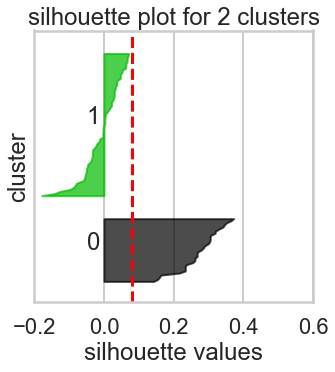

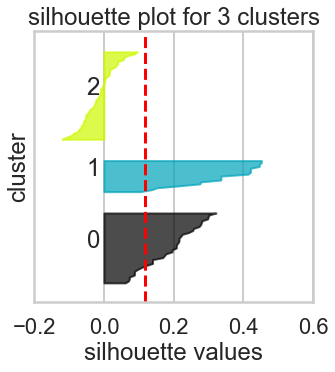

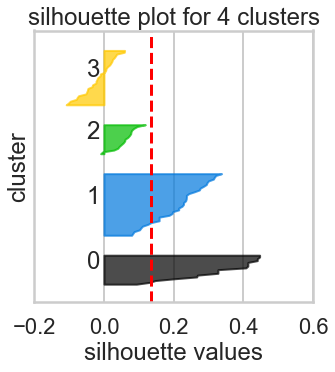

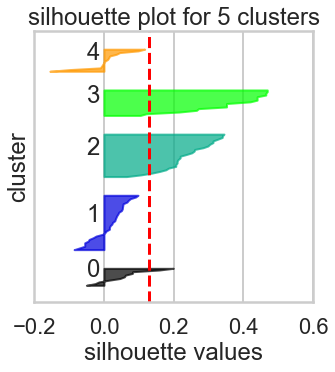

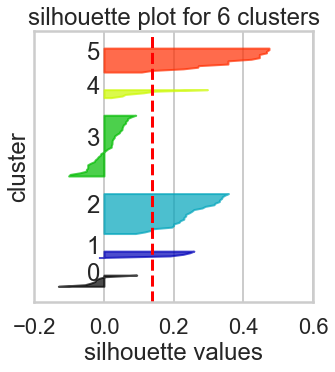

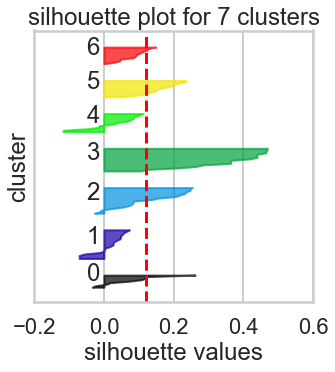

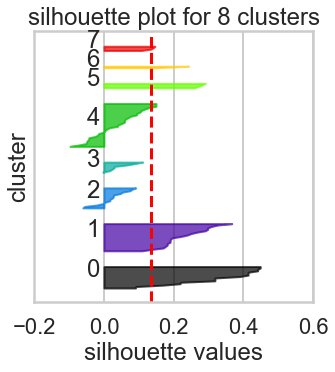

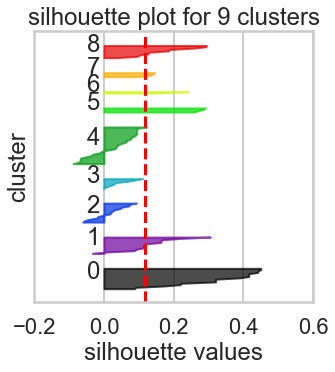

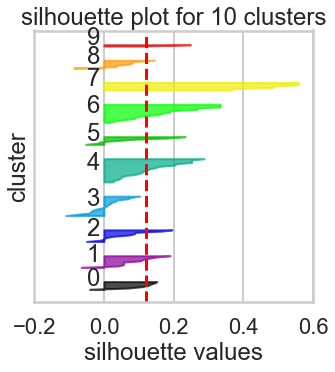

In [35]:
avg_sil = []

#for i in range(7, 9):
for i in range(df_all_models.shape[0]):
    # Get values out of df
    num_clusters = df_all_models.iloc[i]['K']
    fitted_model = df_all_models.iloc[i]['fitted model']
    
    # Create a subplot with 1 row and 2 columns
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    fig, (ax1) = plt.subplots(1, 1)
    #fig.set_size_inches(18, 7);
    fig.set_size_inches(5, 5);

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.2, 0.6]);
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_cols) + (num_clusters + 1) * 10]);

    # Get cluster labels
    cluster_labels = fitted_model.labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    avg_sil.append(silhouette_avg)
    #print("For num_clusters =", num_clusters,
    #      "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    silhouette_val = silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(num_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = silhouette_val[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7);

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i));

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title('silhouette plot for ' + str(num_clusters) + ' clusters');
    ax1.set_xlabel('silhouette values');
    ax1.set_ylabel('cluster');

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--");

    ax1.set_yticks([]);  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6]);

plt.show();

### average silhouette scores for each K

In [36]:
df_all_models['avg silhouette'] = avg_sil
df_all_models

,K,SS,fitted model,dSS,avg silhouette
0,2,251.922394,"KMeans(n_clusters=2, random_state=59)",0.000000,0.080650
1,3,227.985035,"KMeans(n_clusters=3, random_state=59)",-23.937359,0.118899
2,4,214.214475,"KMeans(n_clusters=4, random_state=59)",-13.770559,0.133749
3,5,204.158487,"KMeans(n_clusters=5, random_state=59)",-10.055988,0.130098
4,6,196.052244,"KMeans(n_clusters=6, random_state=59)",-8.106244,0.138926
5,7,187.717201,"KMeans(n_clusters=7, random_state=59)",-8.335043,0.120833
6,8,177.507124,KMeans(random_state=59),-10.210077,0.135579
7,9,171.791438,"KMeans(n_clusters=9, random_state=59)",-5.715686,0.118453
8,10,164.849499,"KMeans(n_clusters=10, random_state=59)",-6.941939,0.119303


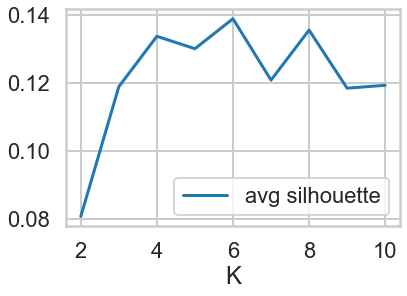

In [37]:
df_all_models.plot(x='K', y='avg silhouette');

### conclusions
- `K=6` has largest silhouette score: 0.139
- `K=4, 8` have values very close: 0.134, 0.136
- `K=4` silhouette plot: 2 clusters entirely below average value
- `K=6` silhouette plot: 2 clusters entirely below average value; 2 clusters have 1/2 of points below average
- `K=8` silhouette plot: 4 clusters almost entirely below average value
- `K=6 or 4` is best value   
   
### recommended next steps
investigate contents of the 2 large clusters in `K=4, 6`   
- contain same points?
- recluster all of points in these 4 clusters

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [38]:
#your turn


### create dataframe
include cluster labels for`K=4, 6, 8` because they had largest values of average silhouette

In [39]:
customer = pivot['customer_name']
customer

0        Adams
1        Allen
2     Anderson
3       Bailey
4        Baker
        ...   
95    Williams
96      Wilson
97        Wood
98      Wright
99       Young
Name: customer_name, Length: 100, dtype: object

In [40]:
cluster = df_all_models[df_all_models['K']==6]['fitted model'].values[0].labels_
cluster

array([2, 3, 5, 2, 3, 3, 5, 2, 3, 2, 4, 5, 2, 4, 2, 5, 0, 5, 2, 3, 2, 3,
       3, 4, 5, 3, 3, 0, 3, 5, 3, 3, 3, 1, 2, 2, 3, 2, 4, 2, 5, 5, 3, 3,
       2, 1, 2, 3, 0, 4, 3, 3, 3, 5, 3, 2, 5, 3, 2, 1, 3, 3, 0, 2, 2, 5,
       5, 3, 4, 3, 3, 3, 3, 2, 3, 2, 5, 3, 3, 5, 0, 0, 3, 5, 2, 2, 2, 0,
       0, 3, 1, 2, 3, 2, 3, 3, 2, 3, 1, 3])

In [41]:
df_pca = pd.DataFrame(data=customer, columns=['customer_name'])
#df_pca.head()

for k in [4, 6, 8]:
    cluster = df_all_models[df_all_models['K']==k]['fitted model'].values[0].labels_
    df_temp = pd.DataFrame(data=cluster, columns=['cluster_'+str(k)])
    df_pca = pd.concat([df_pca, df_temp], axis=1)

df_pca.head()

,customer_name,cluster_4,cluster_6,cluster_8
0,Adams,1,2,1
1,Allen,3,3,4
2,Anderson,0,5,0
3,Bailey,1,2,1
4,Baker,2,3,4


### do PCA with 2 components

In [42]:
pca_model = PCA(n_components=2, whiten=False, random_state=59)
pca_components = pca_model.fit_transform(x_cols)

In [43]:
pca_components

array([[ 1.00757996e+00,  1.08214665e-01],
       [-2.87539237e-01,  4.47145141e-02],
       [-3.92032043e-01,  1.03839141e+00],
       [ 6.99477269e-01, -2.25422232e-02],
       [ 8.81832248e-02, -4.71695431e-01],
       [-4.85281909e-01, -7.25503292e-01],
       [-5.91940987e-01,  1.50649994e+00],
       [ 6.61731534e-01,  9.03075520e-02],
       [-1.18943267e-01, -5.77498507e-01],
       [ 1.07982739e+00, -7.48818111e-03],
       [-2.40431061e-01, -6.17026041e-01],
       [-5.22247106e-01,  1.23140642e+00],
       [ 1.26076270e+00, -1.42550704e-02],
       [-5.79220584e-01, -4.20474690e-01],
       [ 1.93998464e-01,  1.03057282e-02],
       [-3.92032043e-01,  1.03839141e+00],
       [-4.06275667e-01, -4.57711391e-02],
       [-5.91940987e-01,  1.50649994e+00],
       [ 7.36154519e-01,  1.17752476e-01],
       [-3.49056937e-01, -2.67081210e-01],
       [ 1.41224694e+00, -1.23874426e-01],
       [ 1.81048277e-01, -2.06529405e-02],
       [-3.71484955e-01, -3.48006774e-01],
       [-5.

In [44]:
df_temp = pd.DataFrame(pca_components, columns=['x', 'y'])
#df_temp.head()

df_pca = pd.concat([df_pca, df_temp], axis=1)
df_pca.head()

,customer_name,cluster_4,cluster_6,cluster_8,x,y
0,Adams,1,2,1,1.007580,0.108215
1,Allen,3,3,4,-0.287539,0.044715
2,Anderson,0,5,0,-0.392032,1.038391
3,Bailey,1,2,1,0.699477,-0.022542
4,Baker,2,3,4,0.088183,-0.471695


### make plots

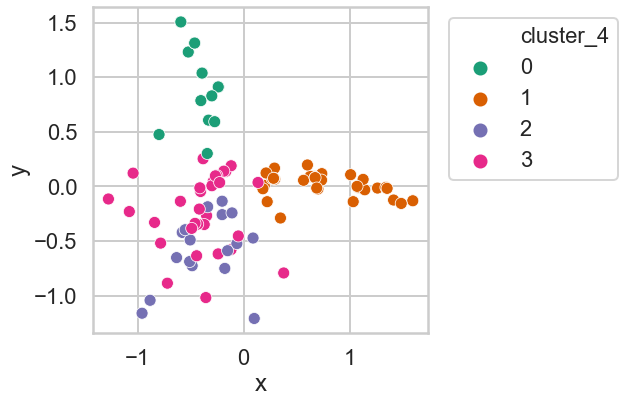

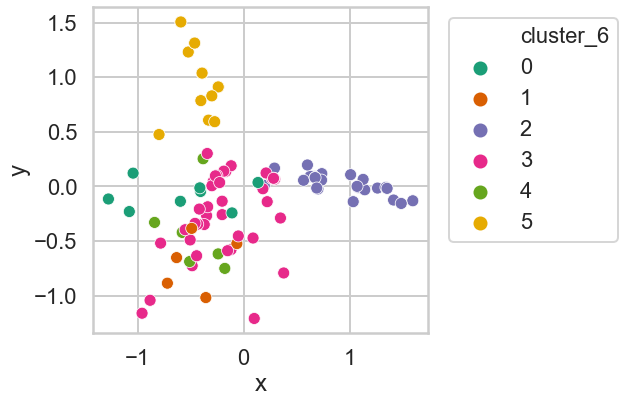

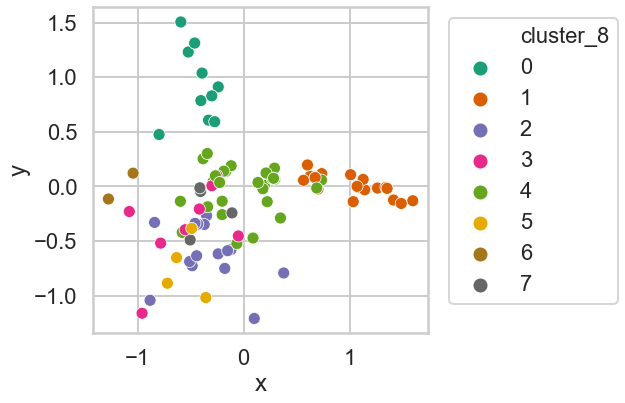

In [45]:
for cluster in ['cluster_4', 'cluster_6', 'cluster_8']:
    _ = plt.figure(figsize=(6, 6));
    _ = sns.scatterplot(data=df_pca, x='x', y='y', hue=cluster, legend='full', palette='Dark2');
    _ = plt.legend(bbox_to_anchor=(1.6,1), loc='upper right');

### conclusions from PCA and plotting
- both `K=4` and `K=6` have 2 distinct clusters with all other points in overlapping clusters
- use `K=4` assignments to investigate original data; clusters 0 and 1 do not overlap

### recall existing dataframes to be used for merging

In [46]:
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [47]:
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [48]:
df_pca.head()

,customer_name,cluster_4,cluster_6,cluster_8,x,y
0,Adams,1,2,1,1.007580,0.108215
1,Allen,3,3,4,-0.287539,0.044715
2,Anderson,0,5,0,-0.392032,1.038391
3,Bailey,1,2,1,0.699477,-0.022542
4,Baker,2,3,4,0.088183,-0.471695


### merge dataframes

In [49]:
df_grand = pd.merge(left=df_transactions[['customer_name', 'offer_id']],
                    right=df_offers,
                    how='left', left_on='offer_id', right_on='offer_id')
#df_grand.head()

df_grand = pd.merge(left=df_grand,
                    right=df_pca[['customer_name', 'cluster_4']],
                    how='left', left_on='customer_name', right_on='customer_name')
df_grand.head()

,customer_name,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,cluster_4
0,Smith,2,January,Pinot Noir,72,17,France,False,0
1,Smith,24,September,Pinot Noir,6,34,Italy,False,0
2,Johnson,17,July,Pinot Noir,12,47,Germany,False,0
3,Johnson,24,September,Pinot Noir,6,34,Italy,False,0
4,Johnson,26,October,Pinot Noir,144,83,Australia,False,0


In [50]:
df_grand.tail()

,customer_name,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,cluster_4
319,Fisher,11,May,Champagne,72,85,France,False,2
320,Fisher,22,August,Champagne,72,63,France,False,2
321,Fisher,28,November,Cabernet Sauvignon,12,56,France,True,2
322,Fisher,30,December,Malbec,6,54,France,False,2
323,Fisher,31,December,Champagne,72,89,France,False,2


### print out some customers to verify merge

In [51]:
df_pca[df_pca['customer_name']=='Smith']
df_pca[df_pca['customer_name']=='Johnson']
df_pca[df_pca['customer_name']=='Fisher']

,customer_name,cluster_4,cluster_6,cluster_8,x,y
83,Smith,0,5,0,-0.300227,0.829765


,customer_name,cluster_4,cluster_6,cluster_8,x,y
41,Johnson,0,5,0,-0.461726,1.313485


,customer_name,cluster_4,cluster_6,cluster_8,x,y
23,Fisher,2,4,2,-0.509137,-0.687321


### investigate clusters 0 and 1

In [52]:
df_grand_c0 = df_grand[df_grand['cluster_4']==0]
df_grand_c0.head()

,customer_name,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,cluster_4
0,Smith,2,January,Pinot Noir,72,17,France,False,0
1,Smith,24,September,Pinot Noir,6,34,Italy,False,0
2,Johnson,17,July,Pinot Noir,12,47,Germany,False,0
3,Johnson,24,September,Pinot Noir,6,34,Italy,False,0
4,Johnson,26,October,Pinot Noir,144,83,Australia,False,0


In [53]:
df_grand_c1 = df_grand[df_grand['cluster_4']==1]
df_grand_c1.head()

,customer_name,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,cluster_4
8,Brown,7,March,Prosecco,6,40,Australia,True,1
9,Brown,29,November,Pinot Grigio,6,87,France,False,1
10,Brown,30,December,Malbec,6,54,France,False,1
11,Jones,8,March,Espumante,6,45,South Africa,False,1
26,Wilson,8,March,Espumante,6,45,South Africa,False,1


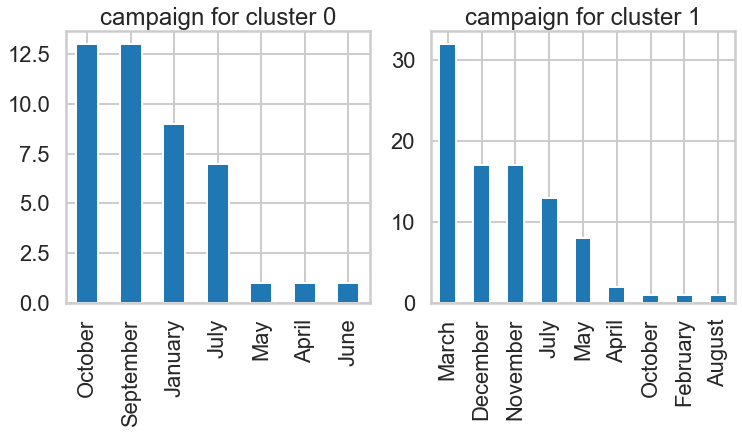

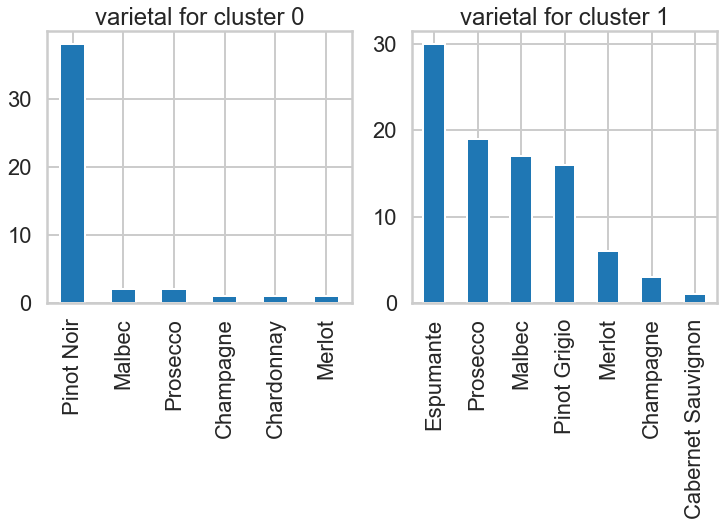

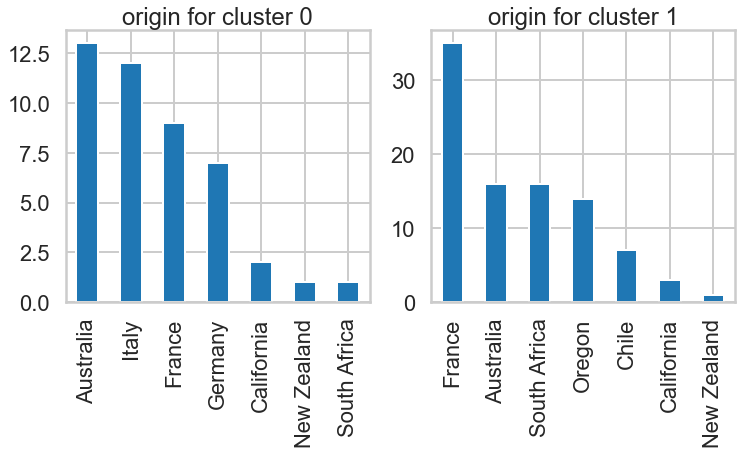

In [54]:
for col in ['campaign', 'varietal', 'origin']:
    counts_0 = df_grand_c0[col].value_counts()
    counts_1 = df_grand_c1[col].value_counts()
    
    fig, (ax1, ax2) = plt.subplots(1, 2);
    _ = fig.set_figheight(5);
    _ = fig.set_figwidth(12);

    _ = counts_0.plot.bar(ax=ax1);
    _ = counts_1.plot.bar(ax=ax2);
    
    _ = ax1.set_title(col + ' for cluster 0');
    _ = ax2.set_title(col + ' for cluster 1');

### discussion of clusters 0 and 1
- cluster 0 is almoste entirely Pinor Noir with origins in Australia, Italy, France, and Germany
- for cluster 1, the largest categories are March for campaign, Espumante for varietal, and France for origin

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

In [55]:
#your turn
# Initialize a new PCA model with a default number of components.
#import sklearn.decomposition
#pca = sklearn.decomposition.PCA()
#pca.fit(X)

# Do the rest on your own :)


### what is `explained_variance_`

In [56]:
pca_model.explained_variance_
np.linalg.norm(pca_model.explained_variance_)

array([0.4096489 , 0.30753551])

0.5122404812698167

### PCA with # components = # features

In [57]:
x_cols.shape

(100, 32)

In [58]:
pca_max = PCA()
pca_max.fit(x_cols)

PCA()

In [59]:
pca_max.n_components_
pca_max.explained_variance_

32

array([0.4096489 , 0.30753551, 0.2022926 , 0.16703717, 0.15015248,
       0.1434373 , 0.13818887, 0.12192294, 0.11636172, 0.10804271,
       0.09937813, 0.09495961, 0.08690352, 0.07256738, 0.0660996 ,
       0.06245473, 0.05634388, 0.05327395, 0.04728801, 0.04393911,
       0.03900424, 0.03625783, 0.03455714, 0.03235091, 0.02940632,
       0.02618221, 0.02308167, 0.02142632, 0.018814  , 0.0165252 ,
       0.01426187, 0.0077789 ])

### make dataframe with `explained_variance` and its derivative

In [60]:
df_variance = pd.DataFrame(data=pca_max.explained_variance_, columns=['explained_variance'])
df_variance = df_variance.reset_index()
df_variance = df_variance.rename(columns={'index':'PC_index'})
df_variance.head()

,PC_index,explained_variance
0,0,0.409649
1,1,0.307536
2,2,0.202293
3,3,0.167037
4,4,0.150152


In [61]:
deriv = []
deriv.append(0)

var_values = df_variance['explained_variance'].values
for i in range(1, df_variance.shape[0]):
    slope = var_values[i]-var_values[i-1]
    #print(df_all_models['K'][i], ss_values[i], slope)
    deriv.append(slope)

#deriv

df_variance['derivative'] = deriv
df_variance.head(10)

,PC_index,explained_variance,derivative
0,0,0.409649,0.000000
1,1,0.307536,-0.102113
2,2,0.202293,-0.105243
3,3,0.167037,-0.035255
4,4,0.150152,-0.016885
5,5,0.143437,-0.006715
6,6,0.138189,-0.005248
7,7,0.121923,-0.016266
8,8,0.116362,-0.005561
9,9,0.108043,-0.008319


### plot to identify best value for # components

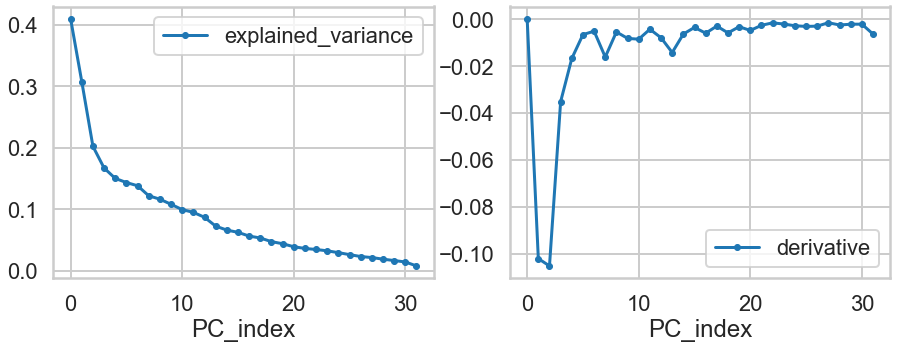

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2);
_ = fig.set_figheight(5);
_ = fig.set_figwidth(15);

_ = df_variance.plot(x='PC_index', y='explained_variance', ax=ax1, style='.-');
_ = df_variance.plot(x='PC_index', y='derivative', ax=ax2, style='.-');

### discussion
- elbow is at `PC_index = 5`
- best choice for PCA reduction is `n_components = 6`

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

comparison of many clustering algorithms on toy datasets   
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [63]:
# Your turn

### Affinity Propogation
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html   
https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html#sphx-glr-auto-examples-cluster-plot-affinity-propagation-py   
https://www.geeksforgeeks.org/affinity-propagation-in-ml-to-find-the-number-of-clusters/

In [64]:
ap = AffinityPropagation(random_state=59).fit(x_cols)

In [65]:
ap.labels_

array([ 0, 10,  6,  3, 12, 12,  6,  8,  4,  2,  9, 13,  2, 12,  4,  6,  3,
        6,  0,  1,  2,  8,  4,  9,  6, 10, 11,  4, 10, 13,  3,  8,  4,  7,
       10,  5,  4,  2,  4,  5,  6,  6,  8, 12,  3,  7,  2,  3, 10,  4,  1,
       12, 13,  6,  8,  8,  6,  3,  0, 12, 12,  8, 12,  0,  0, 13,  6, 11,
        9, 10, 11, 10,  7,  3, 12,  3, 13,  3, 10, 13, 11, 10, 11, 13,  2,
        5,  0, 10, 10,  8, 12,  0,  8,  3,  1, 12,  8, 12,  7, 10],
      dtype=int64)

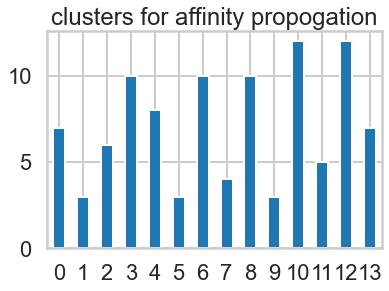

In [66]:
ap_counts = pd.Series(ap.labels_).value_counts().sort_index()

ap_counts.plot.bar(rot=0);
plt.title('clusters for affinity propogation');

### Spectral Clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

In [67]:
sp = SpectralClustering(n_clusters=4, random_state=59).fit(x_cols)

In [68]:
sp.labels_

array([1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 3, 2, 0, 0, 0, 0, 0, 1, 1, 0, 3, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 3, 1, 0, 0, 0, 0, 3, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 3, 1, 0, 1, 2, 0, 1, 2, 0, 3, 0, 2, 1, 1, 1, 0,
       0, 1, 3, 1, 0, 1, 0, 0, 1, 0, 3, 3])

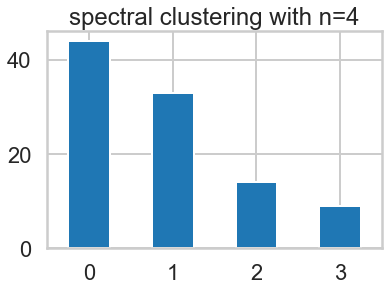

In [69]:
sp_counts = pd.Series(sp.labels_).value_counts().sort_index()

sp_counts.plot.bar(rot=0);
plt.title('spectral clustering with n=4');

### Algomerative Clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [70]:
ag = AgglomerativeClustering(n_clusters=4).fit(x_cols)

In [71]:
ag.labels_

array([1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       3, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 3, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 3, 1, 0, 0, 0, 0, 0, 2, 2, 3, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 3, 1, 0, 1, 2, 3, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0,
       0, 1, 3, 1, 0, 1, 0, 0, 1, 0, 3, 0], dtype=int64)

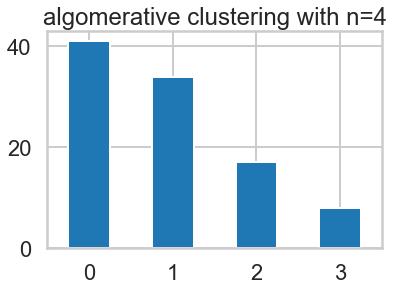

In [72]:
ag_counts = pd.Series(ag.labels_).value_counts().sort_index()

ag_counts.plot.bar(rot=0);
plt.title('algomerative clustering with n=4');

### DBSCAN
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN   
   
results: all samples are labeled noisy

In [73]:
db = DBSCAN().fit(x_cols)

In [74]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

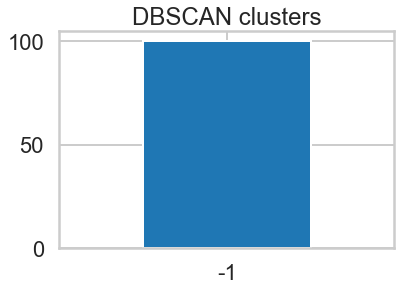

In [75]:
db_counts = pd.Series(db.labels_).value_counts().sort_index()

db_counts.plot.bar(rot=0);
plt.title('DBSCAN clusters');

### compare cluster sizes for algorithms with n=4 specified

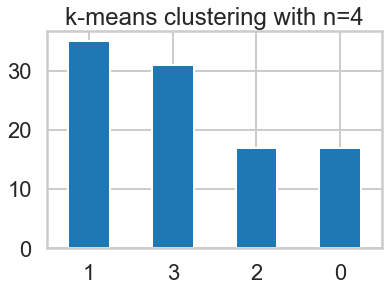

In [76]:
km_result = df_all_models[df_all_models['K']==4]['fitted model']
km = km_result.values[0]

#km_counts = pd.Series(km.labels_).value_counts().sort_index()
km_counts = pd.Series(km.labels_).value_counts()

km_counts.plot.bar(rot=0);
plt.title('k-means clustering with n=4');

In [77]:
df_cluster_sizes_n_4 = pd.DataFrame(data=zip(sp_counts, ag_counts, km_counts),
                                    columns=['spectral', 'agglomerative', 'k-means'])
df_cluster_sizes_n_4

,spectral,agglomerative,k-means
0,44,41,35
1,33,34,31
2,14,17,17
3,9,8,17


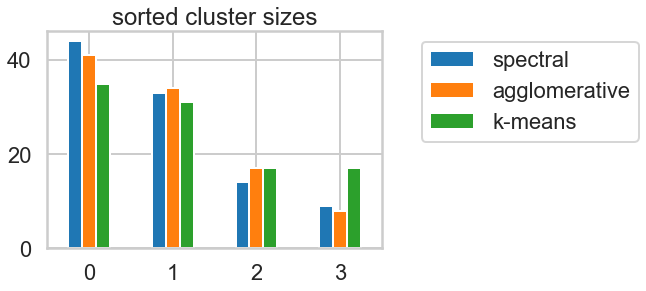

In [78]:
df_cluster_sizes_n_4.plot.bar(rot=0);
plt.legend(bbox_to_anchor=(1.8,1), loc='upper right');
plt.title('sorted cluster sizes');